In [18]:
!pip install yellowbrick


     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/282.6 kB 140.3 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/282.6 kB 140.3 kB/s eta 0:00:02
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 217.9 kB/s eta

In [20]:
!pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


### Importing the libraries

In [21]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


### Importing the dataset

In [22]:
dataset = pd.read_csv("C:\\Users\\khyat\\Downloads\\emails.csv")

### Creating the Machine learning model

#### Cloning the Dataframe

In [23]:
df_emails = dataset
df_emails.head(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


### Defining the parameters

In [24]:
# Defining the last column as a class to be predicted and trained
classe = df_emails.iloc[:,3001].values
classe

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [25]:
# We dont get the last column and the first one
forecasters = df_emails.iloc[:,1:3001]
forecasters

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [26]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(forecasters,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 0)

### Decision tree


In [27]:
# Creating and training the model
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [28]:
# Exporting the decision tree to the .dot format so we can see later:
export_graphviz(arvore, out_file = 'tree.dot')

In [29]:
# Forecasting: 
previsoestree = arvore.predict(X_teste)
previsoestree

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
# Hit rate
hr_dt = accuracy_score(y_teste, previsoestree)*100
hr_dt

93.04347826086956

In [31]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(arvore,X_treinamento, y_treinamento , cv=10)
cv_dt=cv_dt.mean()*100
cv_dt

92.50593629738802

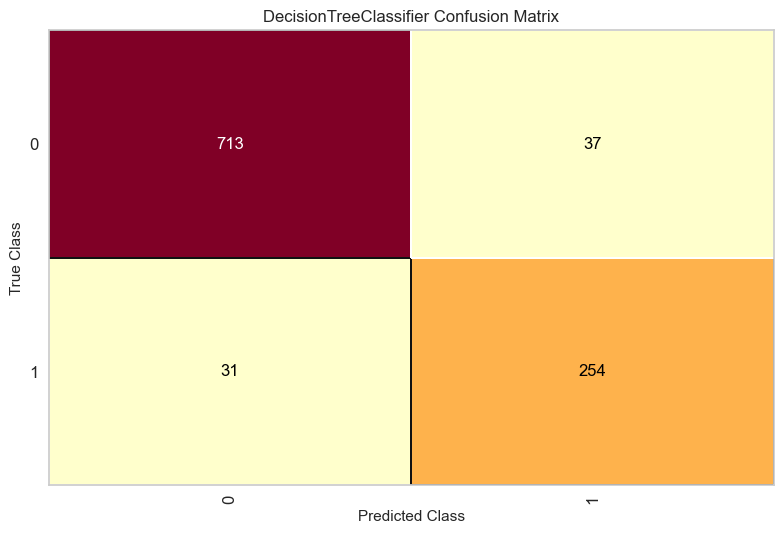

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# Showing the confusion matrix
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()